In [62]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [63]:
df = pd.read_csv("urban_noise_levels.csv")
df.head()

,id,latitude,longitude,datetime,decibel_level,hour,day_of_week,is_weekend,temperature_c,humidity_%,...,population_density,park_proximity,industrial_zone,vehicle_count,honking_events,public_event,holiday,school_zone,noise_complaints,sensor_id
0,1,40.649816,-74.069147,2023-04-01 18:50:00,78.286408,18,5,1,16.710979,43.054747,...,28384,0,0,24,1,0,0,1,1,31
1,2,40.880286,-74.076511,2023-03-18 04:12:00,68.131845,4,5,1,10.088749,29.676246,...,24206,0,0,15,2,0,0,0,0,40
2,3,40.792798,-73.746873,2023-12-03 05:43:00,58.934966,5,6,1,19.911075,47.932832,...,1894,1,0,15,2,0,0,0,0,41
3,4,40.739463,-74.075227,2023-06-20 00:44:00,69.559042,0,1,0,3.477520,88.594010,...,2265,1,0,24,4,0,0,1,2,50
4,5,40.562407,-74.064025,2023-12-28 12:06:00,60.409097,12,3,0,17.356303,35.811699,...,23807,1,0,25,2,0,0,0,0,8


In [64]:
print(df.columns.tolist())


['id', 'latitude', 'longitude', 'datetime', 'decibel_level', 'hour', 'day_of_week', 'is_weekend', 'temperature_c', 'humidity_%', 'wind_speed_kmh', 'precipitation_mm', 'traffic_density', 'near_airport', 'near_highway', 'near_construction', 'population_density', 'park_proximity', 'industrial_zone', 'vehicle_count', 'honking_events', 'public_event', 'holiday', 'school_zone', 'noise_complaints', 'sensor_id']


In [65]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

print("Numeric columns found:", numeric_cols)

noise_column = numeric_cols[0]

print("✅ Using noise column:", noise_column)

df.rename(columns={noise_column: "noise_level_db"}, inplace=True)


Numeric columns found: Index(['id', 'latitude', 'longitude', 'decibel_level', 'hour', 'day_of_week',
       'is_weekend', 'temperature_c', 'humidity_%', 'wind_speed_kmh',
       'precipitation_mm', 'traffic_density', 'near_airport', 'near_highway',
       'near_construction', 'population_density', 'park_proximity',
       'industrial_zone', 'vehicle_count', 'honking_events', 'public_event',
       'holiday', 'school_zone', 'noise_complaints', 'sensor_id'],
      dtype='object')
✅ Using noise column: id


In [66]:
def health_risk(db):
    if db < 55:
        return "Low"
    elif db <= 70:
        return "Medium"
    else:
        return "High"

df["health_risk"] = df["noise_level_db"].apply(health_risk)


In [67]:
risk_map = {"Low": 30, "Medium": 60, "High": 90}
df["health_risk_score"] = df["health_risk"].map(risk_map)


In [68]:
le = LabelEncoder()

for col in ["area_type", "time_of_day"]:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

In [69]:
required_features = ["noise_level_db", "traffic_density", "area_type", "time_of_day"]
existing_features = [col for col in required_features if col in df.columns]

X = df[existing_features]
y = df["health_risk_score"]


In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [71]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [72]:
y_pred = model.predict(X_test)

In [73]:
print("\n📊 Model Performance")
print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²  :", r2_score(y_test, y_pred))


📊 Model Performance
MAE : 4.2909078765634545
RMSE: 8.354005923048586
R²  : 0.06007521936254723


In [74]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

print("\n📈 Model Coefficients")
print(coef_df)



📈 Model Coefficients
           Feature  Coefficient
0   noise_level_db     0.005740
1  traffic_density    -0.276774


In [75]:
sample = X_test.iloc[[0]]
prediction = model.predict(sample)

print("\n🔮 Sample Prediction (Health Risk Score):", prediction[0])


🔮 Sample Prediction (Health Risk Score): 92.99167641523766


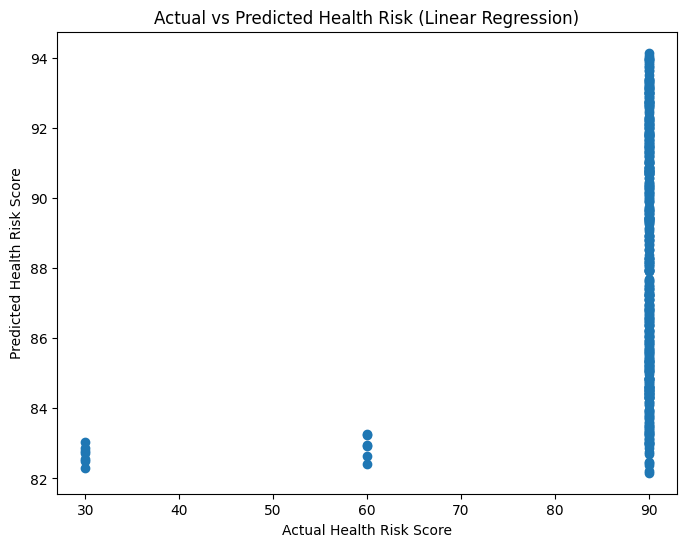

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Health Risk Score")
plt.ylabel("Predicted Health Risk Score")
plt.title("Actual vs Predicted Health Risk (Linear Regression)")
plt.show()


In [77]:
import os
print(os.listdir())


['.config', 'app_streamlit.py', 'logs.txt', 'urban_noise_levels.csv', 'noise_health_model.pkl', '.ipynb_checkpoints', 'sample_data']


In [78]:
import pandas as pd
import joblib
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv("urban_noise_levels.csv")

# Select features
X = df[[
    "decibel_level",
    "traffic_density",
    "hour",
    "population_density"
]]

y = df["noise_complaints"]

# Train model
model = LinearRegression()
model.fit(X, y)

# Save model
joblib.dump(model, "noise_health_model.pkl")

print("✅ Model saved successfully!")


✅ Model saved successfully!


In [79]:
import os
print(os.listdir())

['.config', 'app_streamlit.py', 'logs.txt', 'urban_noise_levels.csv', 'noise_health_model.pkl', '.ipynb_checkpoints', 'sample_data']


In [80]:
import joblib

model = joblib.load("noise_health_model.pkl")
print("Model expects features:", model.n_features_in_)

Model expects features: 4


In [81]:
import pandas as pd
import joblib
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv("urban_noise_levels.csv")

# Select meaningful features
X = df[[
    "decibel_level",
    "traffic_density",
    "hour",
    "population_density"
]]

# Target as health risk proxy
y = df["noise_complaints"]

# Train model
model = LinearRegression()
model.fit(X, y)

print("Model trained with features:", model.n_features_in_)

# Save model
joblib.dump(model, "noise_health_model.pkl")
print("✅ Model saved")


Model trained with features: 4
✅ Model saved


In [82]:
!ls

app_streamlit.py  noise_health_model.pkl  urban_noise_levels.csv
logs.txt	  sample_data


In [83]:
!pkill streamlit

In [84]:
!pip install streamlit joblib numpy pyngrok

In [85]:
!streamlit run "app_streamlit.py" &>/content/logs.txt &

In [86]:
from pyngrok import ngrok
ngrok.set_auth_token("39IcmutKWplpWw6lu6kY7jKb0f1_5ZTYFYsAxPtDXKoYPcWyM")

In [87]:
!streamlit run "app_streamlit.py" &>/content/logs.txt &

In [88]:
from pyngrok import ngrok

# Kill any existing ngrok tunnels to free up endpoints
ngrok.kill()

# Now, try to establish the connection again
ngrok.connect(8501)

<NgrokTunnel: "https://noninherently-paradeless-floretta.ngrok-free.dev" -> "http://localhost:8501">